In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Read the ISP data file
isp_data = pd.read_excel('Virus_respiratorios_general.xlsx')



In [ ]:
isp_data.head()

In [ ]:
# Drop unnecessary columns if they exist
columns_to_drop = ['index', 'Unnamed: 2']
isp_data = isp_data.drop(columns=[col for col in columns_to_drop if col in isp_data.columns])

# Remove rows where 'SE' is empty (total and subtotal rows)
isp_data = isp_data[isp_data['SE'].notna()]

# Convert 'Año' and 'SE' to integer if possible
try:
    isp_data[['Año', 'SE']] = isp_data[['Año', 'SE']].astype(int)
except ValueError:
    print('Error converting Año and SE to integer.')

# Convert 'Virus Respiratorio Sincicial' to integer if possible
try:
    isp_data['Virus Respiratorio Sincicial'] = isp_data['Virus Respiratorio Sincicial'].str.replace(',', '').astype(int)
except ValueError:
    print('Error converting Virus Respiratorio Sincicial to integer.')

# Check the dataframe
isp_data.head()

Error converting Año and SE to integer.
Error converting Virus Respiratorio Sincicial to integer.


In [ ]:
# Remove rows where 'SE' is empty (total and subtotal rows)
isp_data = isp_data[isp_data['SE'].notna()]

# Convert 'Año' and 'SE' to integer
isp_data[['Año', 'SE']] = isp_data[['Año', 'SE']].astype(int)

# Convert 'Virus Respiratorio Sincicial' to integer
isp_data['Virus Respiratorio Sincicial'] = isp_data['Virus Respiratorio Sincicial'].str.replace(',', '').astype(int)

# Check the dataframe
isp_data.head()

KeyError: "['Año'] not in index"

In [ ]:
isp_data.columns

Index(['◢ Año', 'SE', 'Unnamed: 2', 'Adenovirus', 'Influenza A', 'Influenza B',
       'Metapneumovirus', 'Parainfluenza', 'SARS-CoV-2',
       'Virus Respiratorio Sincicial', 'Totales'],
      dtype='object')

In [ ]:
# Rename the 'Año' column
isp_data.rename(columns={'◢ Año': 'Año'}, inplace=True)

# Remove rows where 'SE' is empty (total and subtotal rows)
isp_data = isp_data[isp_data['SE'].notna()]

# Convert 'Año' and 'SE' to integer
isp_data[['Año', 'SE']] = isp_data[['Año', 'SE']].astype(int)

# Convert 'Virus Respiratorio Sincicial' to integer
isp_data['Virus Respiratorio Sincicial'] = isp_data['Virus Respiratorio Sincicial'].str.replace(',', '').astype(int)

# Check the dataframe
isp_data.head()

ValueError: invalid literal for int() with base 10: '◢ 2019'

In [ ]:
# Remove non-numeric characters from 'Año'
isp_data['Año'] = isp_data['Año'].str.extract('(\d+)', expand=False)

# Remove rows where 'SE' is empty (total and subtotal rows)
isp_data = isp_data[isp_data['SE'].notna()]

# Convert 'Año' and 'SE' to integer
isp_data[['Año', 'SE']] = isp_data[['Año', 'SE']].astype(int)

# Convert 'Virus Respiratorio Sincicial' to integer
isp_data['Virus Respiratorio Sincicial'] = isp_data['Virus Respiratorio Sincicial'].str.replace(',', '').astype(int)

# Check the dataframe
isp_data.head()

ValueError: cannot convert float NaN to integer

In [ ]:
# Remove non-numeric characters from 'Año'
isp_data['Año'] = isp_data['Año'].str.extract('(\d+)', expand=False)

# Fill NaN values in 'Año' with the forward fill method
isp_data['Año'].fillna(method='ffill', inplace=True)

# Remove rows where 'SE' is empty (total and subtotal rows)
isp_data = isp_data[isp_data['SE'].notna()]

# Convert 'Año' and 'SE' to integer
isp_data[['Año', 'SE']] = isp_data[['Año', 'SE']].astype(int)

# Convert 'Virus Respiratorio Sincicial' to integer
isp_data['Virus Respiratorio Sincicial'] = isp_data['Virus Respiratorio Sincicial'].str.replace(',', '').astype(int)

# Check the dataframe
isp_data.head()

ValueError: invalid literal for int() with base 10: 'Totales'

In [ ]:
# Remove any rows where 'Año' or 'SE' are not numeric
isp_data = isp_data[isp_data['Año'].str.isnumeric() & isp_data['SE'].str.isnumeric()]

# Create a new column 'Date' combining 'Año' and 'SE' as year and week
isp_data['Date'] = isp_data['Año'].astype(str) + '-' + isp_data['SE'].astype(str) + '-1'
isp_data['Date'] = pd.to_datetime(isp_data['Date'], format='%Y-%W-%w')

# Set 'Date' as the index of the dataframe
isp_data.set_index('Date', inplace=True)

# Keep only the 'Virus Respiratorio Sincicial' column for forecasting
vrs_data = isp_data[['Virus Respiratorio Sincicial']]

# Check the dataframe
vrs_data.head()

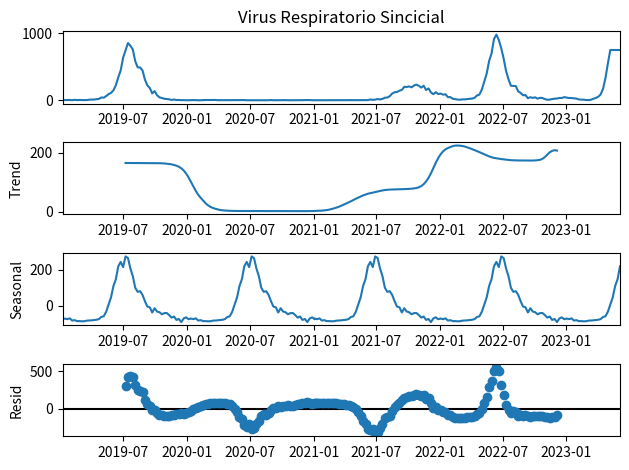

In [ ]:
# Convert 'Virus Respiratorio Sincicial' to numeric, replacing non-numeric values with NaN
vrs_data['Virus Respiratorio Sincicial'] = pd.to_numeric(vrs_data['Virus Respiratorio Sincicial'], errors='coerce')

# Fill NaN values with the forward fill method
vrs_data['Virus Respiratorio Sincicial'].fillna(method='ffill', inplace=True)

# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(vrs_data['Virus Respiratorio Sincicial'], model='additive', period=52)
fig = decomposition.plot()
plt.show()

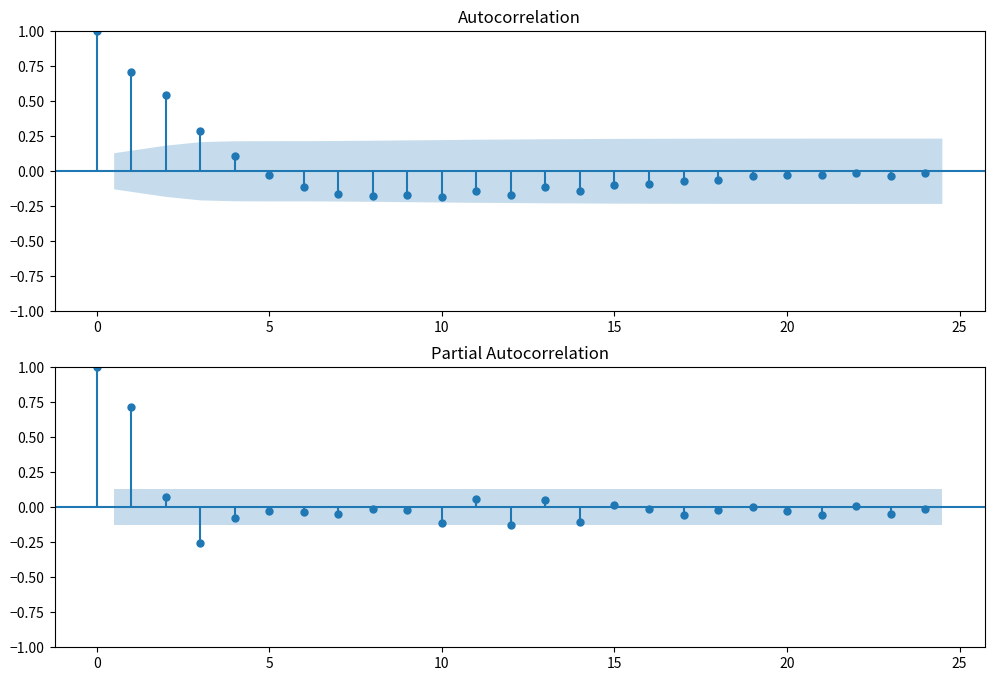

In [ ]:
# Determine the order of differencing (d) in ARIMA model
fig, ax = plt.subplots(2, 1, figsize=(12,8))

# Plot the autocorrelation for the differenced series
plot_acf(vrs_data.diff().dropna(), ax=ax[0])

# Plot the partial autocorrelation for the differenced series
plot_pacf(vrs_data.diff().dropna(), ax=ax[1])

plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


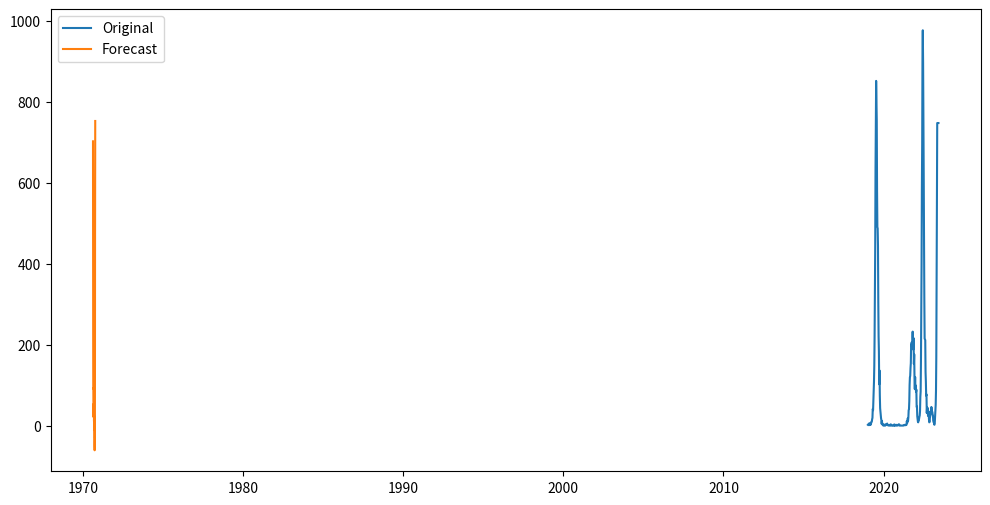

In [ ]:
# Fit the SARIMA model
model = SARIMAX(vrs_data['Virus Respiratorio Sincicial'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 52))
model_fit = model.fit(disp=False)

# Make forecast
forecast = model_fit.forecast(steps=52)

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(vrs_data.index, vrs_data['Virus Respiratorio Sincicial'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

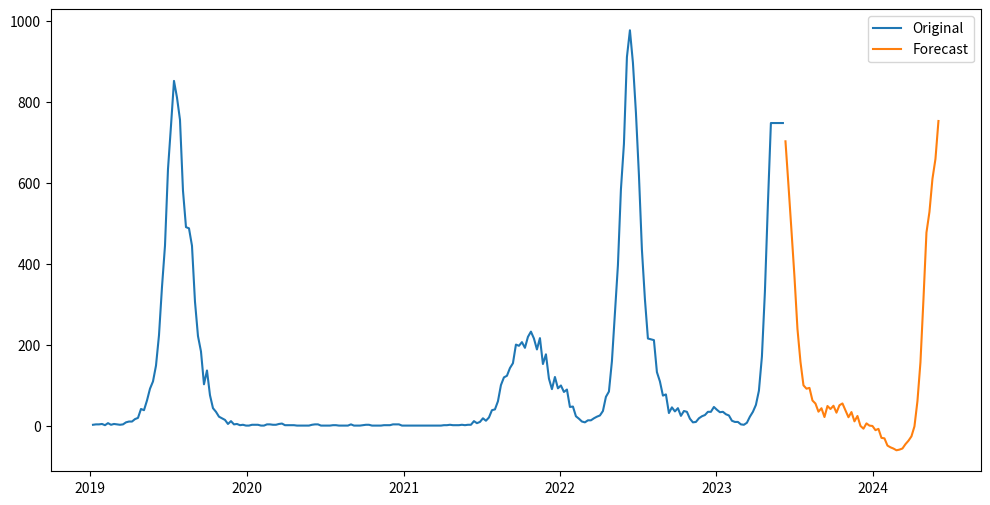

In [ ]:
# Get the last date in the original data
last_date = vrs_data.index[-1]

# Generate a date range for the forecast data starting from the day after the last date in the original data
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=52, freq='W')

# Assign the new date range to the forecast data
forecast.index = forecast_dates

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(vrs_data.index, vrs_data['Virus Respiratorio Sincicial'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

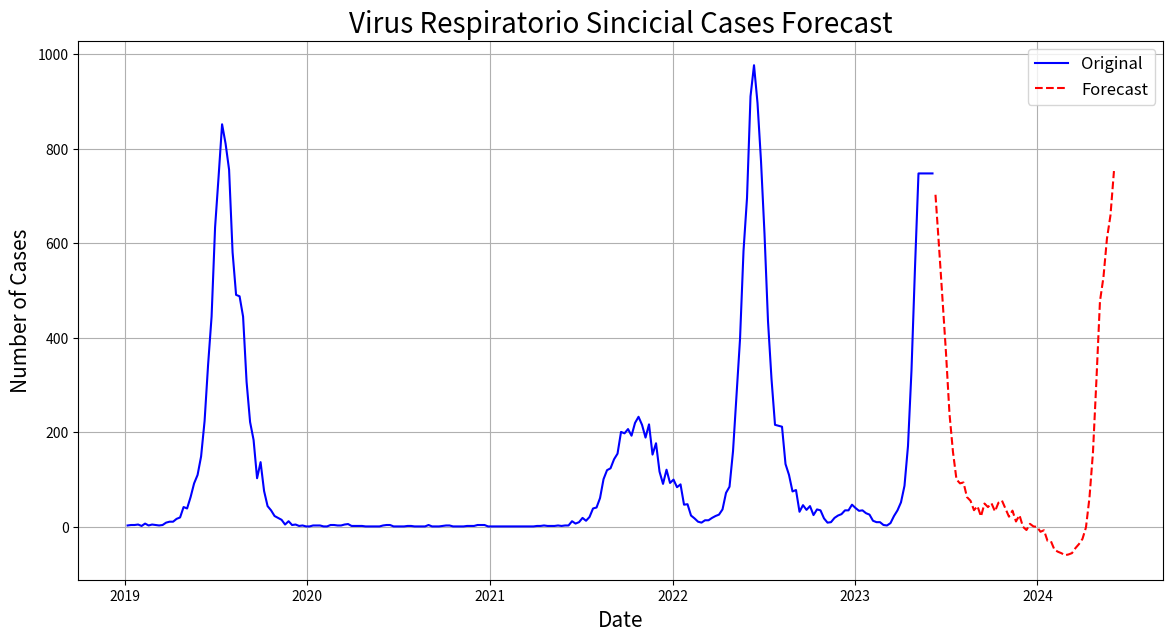

In [ ]:
# Plot the original series and the forecast with improved aesthetics
plt.figure(figsize=(14, 7))
plt.plot(vrs_data.index, vrs_data['Virus Respiratorio Sincicial'], label='Original', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')

# Add title and labels
plt.title('Virus Respiratorio Sincicial Cases Forecast', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Cases', fontsize=15)

# Add a legend
plt.legend(fontsize=12)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()